The "IIT Admissions Dataset" dataset provides valuable information about 200,000 students who have applied for admissions to Indian Institutes of Technology (IITs). It includes details such as the field of study, specialization, fees, and discounts offered to the students.We'll try to answer the following questions:

How many students were admitted esch year?
What is the distribution of students across different field study?
How many students are enrolled in each specialization?
What is the average age of students in each field of study?
What is the current semester distribution among all students?
Are there any correlations between the field of study and the fees paid?
Are there any correlations between the fees and the discount offered on the fees?

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("IIT Admissions Dataset/student_data.csv")

In [8]:
df.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [10]:
df.columns =['student_id','student_name', 'DOB', 'field_of_study', 'year_of_admission', 'expected_graduation', 'current_sem', 'specialization', 'fees', 'discount']
df.describe()

,student_id,year_of_admission,expected_graduation,current_sem,fees,discount
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,549367.492925,2018.997685,2019.995235,2.499020,125092.847595,12484.258575
std,259361.565011,2.002381,1.997744,1.117804,43287.894903,8788.362629
min,100001.000000,2016.000000,2017.000000,1.000000,50000.000000,0.000000
25%,325311.000000,2017.000000,2018.000000,1.000000,87641.500000,5383.000000
50%,548855.500000,2019.000000,2020.000000,2.000000,125221.000000,10792.500000
75%,774182.500000,2021.000000,2022.000000,3.000000,162597.250000,18154.000000
max,999997.000000,2022.000000,2023.000000,4.000000,200000.000000,39865.000000


In [11]:
#Check for missing values 
df.isna().any()

student_id             False
student_name           False
DOB                    False
field_of_study         False
year_of_admission      False
expected_graduation    False
current_sem            False
specialization         False
fees                   False
discount               False
dtype: bool

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   student_id           200000 non-null  int64 
 1   student_name         200000 non-null  object
 2   DOB                  200000 non-null  object
 3   field_of_study       200000 non-null  object
 4   year_of_admission    200000 non-null  int64 
 5   expected_graduation  200000 non-null  int64 
 6   current_sem          200000 non-null  int64 
 7   specialization       200000 non-null  object
 8   fees                 200000 non-null  int64 
 9   discount             200000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.3+ MB


 Creating a cross-tabulation of 'field_of_study' and 'specialization'

In [23]:
cross_tab = pd.crosstab(df['field_of_study'], df['specialization'])
cross_tab

specialization,Artificial Intelligence,Data Science,Machine Learning,Network Security,Web Development
field_of_study,,,,,
Chemical Engineering,7945,7955,7924,8040,8156
Civil Engineering,7864,7925,7880,8076,8029
Computer Science,7900,8018,8131,7887,8024
Electrical Engineering,8058,8032,8201,8028,7986
Mechanical Engineering,7997,7940,8006,7901,8097


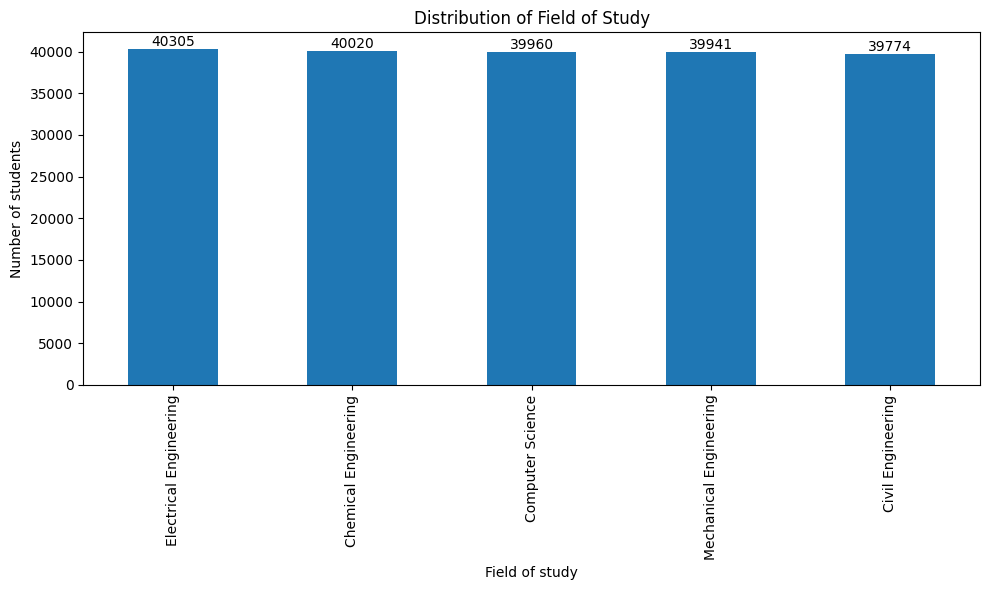

In [30]:
#Distribution of students across different 'field_of_study'
counts = df['field_of_study'].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')

plt.title('Distribution of Field of Study')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.ylabel('Number of students')
plt.xlabel('Field of study')
plt.tight_layout()



In [31]:
#Students enrolled in each specialization
df['specialization'].value_counts()

specialization
Web Development            40292
Machine Learning           40142
Network Security           39932
Data Science               39870
Artificial Intelligence    39764
Name: count, dtype: int64

Text(0.5, 1.0, 'Relationship between Field o Study and Specialization ')

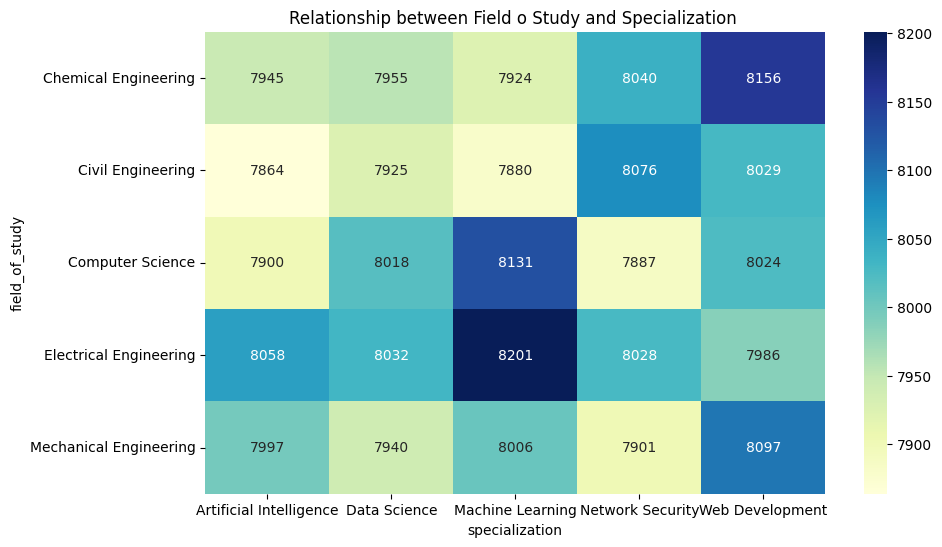

In [33]:
#Explore relationship between Field of Study and the students' specializations
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot= True,fmt='.0f', cmap='YlGnBu')

plt.title("Relationship between Field o Study and Specialization ")

In [41]:
#Exploring any relationship between the field of study and the average age of the students
df['DOB'] = pd.to_datetime(df['DOB'])
df['age'] = (pd.to_datetime('today') - df['DOB'])

#Calculate the age based on current date
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['DOB'].dt.year

df.groupby('field_of_study')['age'].mean()

field_of_study
Chemical Engineering      21.585157
Civil Engineering         21.582240
Computer Science          21.570320
Electrical Engineering    21.585610
Mechanical Engineering    21.590571
Name: age, dtype: float64

year_of_admission
2016    28646
2017    28760
2018    28435
2019    28618
2020    28355
2021    28483
2022    28703
Name: count, dtype: int64


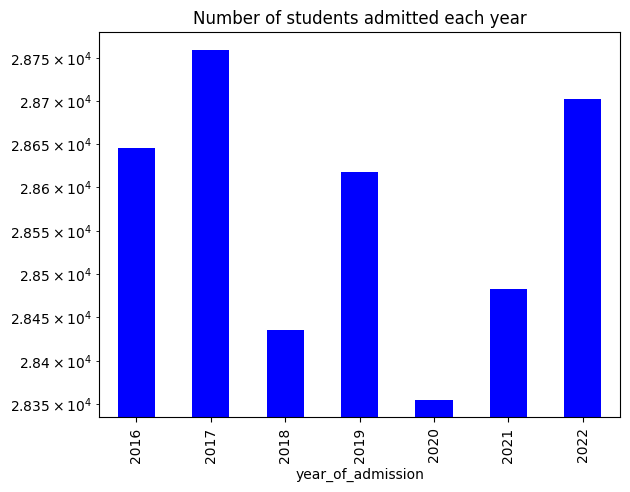

In [57]:
#Students admitted each year
admission_counts = df['year_of_admission'].value_counts().sort_index()
print(admission_counts)

admission_counts.plot(kind='bar', color ='blue')
plt.yscale('log') 
plt.tight_layout()
plt.title('Number of students admitted each year')
plt.show()

Text(0.5, 1.0, 'Current semester distribution')

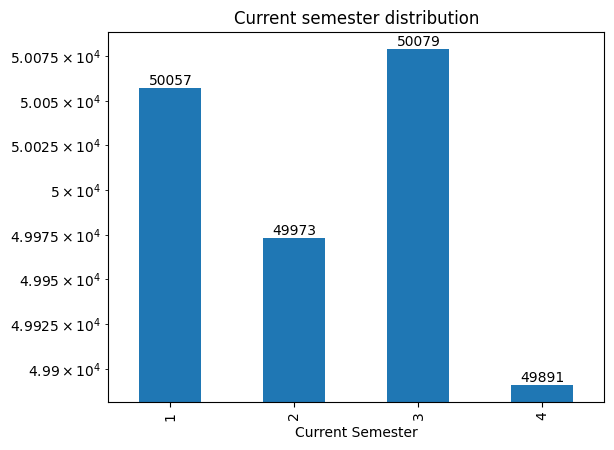

In [66]:
#Current semester distribution among the students
semester_counts = df['current_sem'].value_counts().sort_index()
semester_counts.plot(kind='bar')
plt.yscale('log')
for i, count in enumerate(semester_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xlabel('Current Semester')
plt.title('Current semester distribution')


<Axes: >

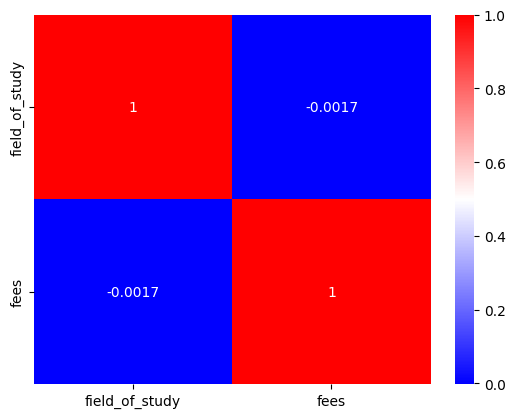

In [72]:
#Exploring the correlation between the field of study and the fees paid
selected_columns = df[['field_of_study','fees']]

#Converting the values in 'field_of_study' to numerical values
field_map = {'Chemical Engineering' : 0, 'Civil Engineering' : 1, 'Computer Science' : 2, 'Electrical Engineering' :3, 'Mechanical Engineering' :4}
selected_columns['field_of_study'] = selected_columns['field_of_study'].map(field_map)

corr_matrix = selected_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap="bwr")

Based on the correlation coefficient of -0.0017, we can conclude that there is no notable relationship between the 'field_of_study' and 'fees' in the dataset.

<Axes: >

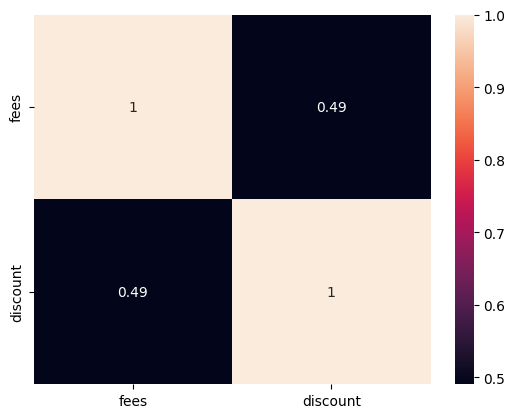

In [73]:
#Exploring the correlation between fees and the discount on the fees
correlation_matrix = df[['fees','discount']].corr()
sns.heatmap(correlation_matrix, annot=True)

From the above heatmap, the correlation coefficient of 0.49 suggests a moderate positive correlation between the fees and the discount offered on the fees. 